<a href="https://colab.research.google.com/github/yamihe19/Project-t-SNE-UMAP-MNIST-Dataset/blob/main/Code_Project_t_SNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# PROJECT t-SNE and UMAP

## Team Members:
- Mary Alexandra Garcia
- Yamileth Sarai Hercules Elias

Objective:

- 1. Understand what are t-SNE and UMAP and be able to explain in the layman terms.
- 2. Demonstrate how to use t-SNE and UMAP in visualizing high-dimensional data.


# 1. Understand what are t-SNE and UMAP and be able to explain in the layman terms.


In general, t-SNE (t-Distributed Stochastic Neighbor Embedding) and UMAP (Uniform Manifold Approximation and Projection) are both dimensionality reduction techniques commonly used in data analysis and visualization.

### t-SNE

t-SNE is a non-linear dimensionality reduction algorithm that aims to transform high-dimensional data into a lower-dimensional representation while preserving the relationships between data points. It is particularly useful for visualizing complex datasets, as it can reveal clusters and patterns that might not be apparent in the original high-dimensional space. t-SNE achieves this by modeling similarities between data points and mapping them to a lower-dimensional space, where similar points are positioned closer together.

### Objective:

The goal is to take a set of points in a high-dimensional space and find a faithful representation of those points in a lower-dimensional space, typically the 2D plane. The algorithm is non-linear and adapts to the underlying data, performing different transformations on different regions. Those differences can be a major source of confusion.

### Comparison between t-SNE and PCA.

PCA and t-SNE are both dimensionality reduction techniques, but they differ in their approaches and effectiveness for visualizing complex data structures. PCA, developed in 1933, is a linear technique that focuses on preserving large pairwise distances to maximize variance. However, it may struggle to capture non-linear structures, leading to poor visualization. In contrast, t-SNE, developed in 2008, preserves small pairwise distances and local similarities, making it more suitable for revealing intricate patterns in data with non-linear manifold structures. This distinction is demonstrated well using the Swiss Roll dataset, where PCA fails to preserve the structure accurately due to its focus on large distances.

### Steps of the Algorithm to create the dimentionality reduction
Hows it works? Let's break out in 3 basic steps:

* 1. In the first step of t-SNE, similarities between points in the high-dimensional space are measured. Each data point is associated with a Gaussian distribution centered on that point. The density of all other points under this Gaussian distribution is calculated and normalized, resulting in probabilities (Pij) that reflect the similarities between points. The Gaussian distribution, or circle, can be adjusted using perplexity, which determines the variance (size) of the distribution and the number of nearest neighbors considered. Perplexity values typically range between 5 and 50.

* 2. In this step, a Student t-distribution with one degree of freedom, also known as the Cauchy distribution, is used instead of a Gaussian distribution. This generates a new set of probabilities (Qij) in the low-dimensional space. The Student t-distribution has heavier tails than the normal distribution, enabling better representation of distant distances between points.

* 3. In the final step, the goal is to make the probabilities in the low-dimensional space (Qij) closely resemble those in the high-dimensional space (Pij). The similarity between the two mapping structures is measured using Kullback-Liebler divergence (KL), which efficiently compares the probability distributions. To achieve this, gradient descent is employed to minimize the KL cost function. The aim is to optimize the mapping and align the two-dimensional representations with the original high-dimensional data.

### Hyperparameters tunning

In t-SNE, there are several important hyperparameters that can significantly affect the results and behavior of the algorithm. The most important hyperparameters in t-SNE are:

* `Perplexity`: Perplexity controls the balance between preserving local and global structures in the data. It determines the effective number of nearest neighbors that influence each data point during dimensionality reduction. Higher perplexity values tend to capture more global structures, while lower values focus more on local structures. It is recommended to experiment with different perplexity values to find the most suitable one for your specific dataset.
* `Learning Rate` (or Step Size): The learning rate determines the step size at each iteration of the optimization process. It affects the speed and convergence of the algorithm. A higher learning rate allows for faster convergence but may result in a suboptimal solution, while a lower learning rate can lead to better quality results but slower convergence. Tuning the learning rate is crucial to achieve optimal performance.
* `Number of Iterations`: The number of iterations defines the total number of optimization steps performed during the t-SNE process. It affects the convergence and stability of the algorithm. Increasing the number of iterations can potentially yield better results, but it also increases the computational time. It is important to balance the number of iterations to achieve a reasonable trade-off between quality and efficiency.
* `Metric`: The choice of distance metric used to measure pairwise similarities between data points can impact the results of t-SNE. The most commonly used metric is Euclidean distance, but other distance metrics, such as cosine similarity or correlation distance, can also be employed depending on the nature of the data and the problem at hand.
* `Random Seed`: The random seed determines the starting point of the optimization process and affects the randomness involved in the algorithm. Setting a specific random seed allows for reproducibility of results and ensures consistent behavior across different runs.

It is essential to carefully tune these hyperparameters based on the characteristics of the data and the desired outcome. Experimentation and evaluating the results with different parameter settings are often necessary to find the optimal combination for your specific use case.


To ilustrate the above steps we are decide to use a simple example of the dataset called "MNIST" to show the steps of T-SNE and then UMAP.



## Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import os as os
import numpy as np
from fcsparser import parse
from sklearn.manifold import TSNE
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas.io.pytables import FilePath

 #MNIST dataset
mnist= pd.read_csv("/content/drive/MyDrive/MNIST.csv")
mnist.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [ ]:
mnist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c0      1797 non-null   int64
 1   c1      1797 non-null   int64
 2   c2      1797 non-null   int64
 3   c3      1797 non-null   int64
 4   c4      1797 non-null   int64
 5   c5      1797 non-null   int64
 6   c6      1797 non-null   int64
 7   c7      1797 non-null   int64
 8   c8      1797 non-null   int64
 9   c9      1797 non-null   int64
 10  c10     1797 non-null   int64
 11  c11     1797 non-null   int64
 12  c12     1797 non-null   int64
 13  c13     1797 non-null   int64
 14  c14     1797 non-null   int64
 15  c15     1797 non-null   int64
 16  c16     1797 non-null   int64
 17  c17     1797 non-null   int64
 18  c18     1797 non-null   int64
 19  c19     1797 non-null   int64
 20  c20     1797 non-null   int64
 21  c21     1797 non-null   int64
 22  c22     1797 non-null   int64
 23  c23     1797 

The dataset has 1797 entries and 65 variables. The target variables are the labels of the data. The `target` is going to help us to distinguish the colors of the cluster in the s-TNE space representation.


In [ ]:
#Standarize the data
std= StandardScaler()
standardized_df =std.fit_transform(mnist.drop("target", axis=1))
print(standardized_df.shape)

(1797, 64)


In [ ]:
# Dataframe of the normalize dataset
df_mnist = pd.DataFrame(standardized_df, columns=mnist.columns[:-1])

In [ ]:
# Perform t-SNE on the dataframe
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=1000)
tsne_result1 = tsne.fit_transform(df_mnist)

For the Hyperparameters we just tunne the following:
- Perplexity
- Learning rate
- Random_state

It is important to mention that tuning these parameters involves a trade-off between computational cost and the potential improvement in results. To effectively tune the hyperparameters of t-SNE, a combination of domain knowledge, intuition, and experimentation is often more effective. Begin with a smaller range of reasonable values for each hyperparameter and refine them iteratively based on observed results. Evaluate the visualization quality, preservation of structures, and performance on downstream tasks to guide the selection of hyperparameters.



<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

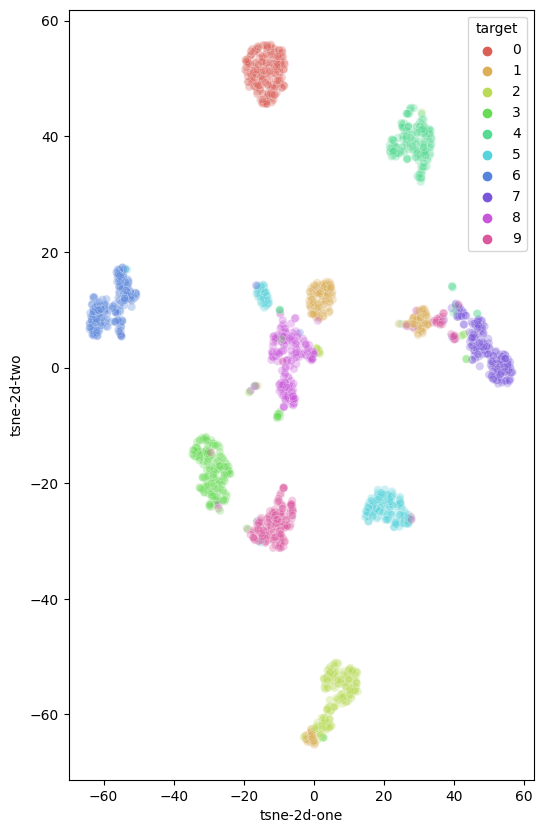

In [ ]:
df_mnist['tsne-2d-one'] = tsne_result1[:,0]
df_mnist['tsne-2d-two'] = tsne_result1[:,1]

plt.figure(figsize=(6,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    hue=mnist['target'],
    data=df_mnist,
    legend="auto",
    alpha=0.3
)


### Interpretation:

After applying t-SNE to reduce the MNIST dataset to two variables, we can clearly observe the distinct patterns and clusters formed by the data points in the 2D representation. The visualization effectively captures the underlying structure of the dataset, allowing for a better understanding of its inherent grouping. Each color corresponds to a different cluster, further highlighting the separation and organization within the data. This reduced-dimensional representation obtained through t-SNE provides valuable insights and facilitates the interpretation of the dataset.



## UMAP (Uniform Manifold Approximation and Projection)

UMAP, on the other hand, is another non-linear dimensionality reduction algorithm that also focuses on preserving local and global relationships between data points. It constructs a high-dimensional graph representation of the data and then optimizes a low-dimensional representation that best maintains these relationships. UMAP has gained popularity for its computational efficiency and ability to retain the global structure of the data.

Both t-SNE and UMAP excel in visualizing high-dimensional datasets and are widely used in various fields, including biology, genetics, natural language processing, and image analysis. They provide powerful tools for exploring complex data, identifying clusters, and uncovering hidden patterns, ultimately aiding in data interpretation and insight generation.



### Steps of UMAP Algorithm to create the dimentionality reduction:

By going through the following 3 steps, UMAP creates a simplified version of the data that can be visualized or used for further analysis. This simplified representation helps us understand the underlying structure and patterns in the data more easily.

- 1. Constructing the Graph: UMAP creates a map of connections between data points based on their proximity to each other in the high-dimensional space. It finds the nearest neighbors for each point and measures the distances between them.

- 2. Fuzzy Topological Representation: UMAP creates a representation of the data as a kind of abstract shape that captures its structure. It considers both local and global relationships between data points, determining how strongly they are connected to each other.

- 3. Optimizing the Low-Dimensional Embedding: UMAP finds the best way to arrange the data points in a lower-dimensional space (e.g., 2D or 3D) while preserving their relationships. It does this by adjusting the positions of the points based on the fuzzy representation, trying to minimize the differences between the high-dimensional and low-dimensional connections.



### Hyperparameters tunning



UMAP has several hyperparameters that can have a significant impact on the resulting embedding. In this project we will be covering the four major ones:

- `n_neighbors`: This parameter determines the number of neighbors to consider when constructing the graph. A higher value captures more global structure but can lead to longer computation times. It is typically set based on the size and density of the dataset and can be tuned to find the right balance.
- `min_dist`: It controls the minimum distance between points in the low-dimensional embedding. A lower value results in a more compact representation, while a higher value encourages points to be more spread out. Tuning min_dist allows you to adjust the level of clustering and separation in the visualization.
- `metric`: UMAP supports various distance metrics, such as Euclidean, Manhattan, or cosine distance. The choice of metric depends on the nature of the data and the specific task. Experimenting with different metrics can help find the most suitable one for a given dataset.
- `n_components`: This parameter determines the dimensionality of the low-dimensional embedding. By default, UMAP reduces the data to two dimensions for visualization purposes, but it can be set to higher values for multi-dimensional embeddings. The appropriate number of components depends on the complexity of the dataset and the desired level of detail.

To illustrate the UMAP functionality, now we will use the "MNIST" dataset again as we did for the tSNE algorithm example:

In [ ]:
import umap

In [ ]:
# Perform UMAP on the dataframe
umap_reducer = umap.UMAP(n_neighbors = 15, n_components = 2, min_dist = 0.1, metric = 'euclidean')
umap_result = umap_reducer.fit_transform(df_mnist)

Hyperparameter tuning in UMAP, similar to t-SNE, involves finding the right balance between computational efficiency and improved results. It's recommended to combine domain knowledge, intuition, and experimentation to achieve more efficient results using fewer resources.

To guide the selection of hyperparameters, we can visually evaluate the quality of the UMAP results. By plotting the UMAP visualization, we can assess how well the algorithm preserves the underlying structures of the data. Additionally, we can measure the performance of the UMAP embeddings in downstream tasks, such as clustering or classification, to assess their effectiveness.

<Axes: xlabel='umap-2d-one', ylabel='umap-2d-two'>

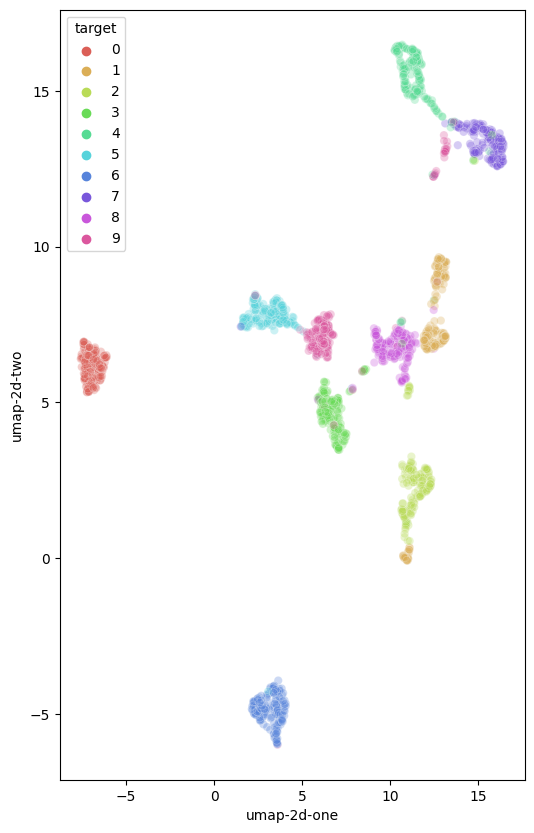

In [ ]:
df_mnist['umap-2d-one'] = umap_result[:,0]
df_mnist['umap-2d-two'] = umap_result[:,1]

plt.figure(figsize=(6,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    palette=sns.color_palette("hls", 10),
    hue=mnist['target'],
    data=df_mnist,
    legend="auto",
    alpha=0.3
)


### Interpretation:

After applying UMAP to reduce the MNIST dataset to a two-dimensional representation, similar to the t-SNE algorithm, we can observe distinct patterns and clusters formed by the data points. The 2D representation allows us to visualize the data in a more interpretable manner.

For instance, when examining the clusters, we notice that they align with the target labels of the dataset. This alignment is logical because the MNIST dataset provides ground truth labels for the handwritten digits. Consequently, we can conclude that the clusters correspond well to the different digits present in the dataset.

Moreover, we can assess the similarity between clusters based on their separation in the UMAP plot. For instance, if we examine the clusters associated with the target labels "4" and "7," we notice that they are located close to each other. This proximity suggests a degree of similarity between these digits, as they share common characteristics and are closely related in terms of their visual representation.

By considering the patterns, cluster formations, and the proximity of different groups, we can gain insights into the relationships and similarities within the MNIST dataset. However, it's important to note that further analysis, validation, and domain expertise are necessary to confirm these interpretations and draw meaningful conclusions from the UMAP plot.

# 2. Demonstrate how to use t-SNE and UMAP in visualizing high-dimensional data.

In this part we are going to use the data from the article link [Cell Reports Methods](https://www.sciencedirect.com/science/article/pii/S2667237522002958)

The dataset selected is [MUS](https://flowrepository.org/id/FR-FCM-Z48W)

## Import Lybraries

In [ ]:
directory_path = '/content/drive/MyDrive/FlowRepository_FR-FCM-Z48W_files 2'

In [ ]:
!pip install fcsparser

Fist, we want to know what is cytometry?
* Cytometry is the quantitative analysis of cells and cell systems. A wide range of cutting edge techniques are used to perform cytometry which plays a crucial role in advancing the frontiers of biology, medicine, and technology.

* The flow cytometry data file standard provides the specifications needed to completely describe flow cytometry data sets within the confines of the file containing the experimental data.

Descripcion of the variables :

* SC-A: Forward Scatter Area
* FSC-H: Forward Scatter Height
* SSC-A: Side Scatter Area
* SSC-B-A: SSC Blue-Area (related to side scatter)
* SSC-B-H: SSC Blue-Height (related to side scatter)
* SSC-H: Side Scatter Height
* FJComp-AF-A: Fluorescent marker measurement (specific marker abbreviation not provided)
* RORgT: RORγT marker
* CD44: Cluster of differentiation 44 (Cell adhesion molecule)
* Gr-1: Granulocyte marker
* IgM: Immunoglobulin M marker
*F4_80: F4/80 marker (Macrophage marker)
*Ki67: Ki-67 marker (Cell proliferation marker)
* CD90.2: Cluster of differentiation 90.2 (Thy-1.2 marker)
* CCR9: Chemokine receptor 9
* TCRgd: T-cell receptor gamma-delta chain
* PDCA-1: Plasmacytoid dendritic cell antigen-1
* CD11c: Cluster of differentiation 11c (Dendritic cell marker)
* Ly-6C: Ly-6C marker (Monocyte/macrophage marker)
* CD103: Cluster of differentiation 103 (Alpha-E integrin)
* IgD: Immunoglobulin D marker
* NK1.1: Natural killer cell marker 1.1
* CTLA-4: Cytotoxic T-lymphocyte-associated protein 4
* c-Kit: Stem cell factor receptor
* CD62L: L-selectin
* GITR: Glucocorticoid-induced tumor necrosis factor receptor
* CD150: Signaling lymphocytic activation molecule (SLAM) family member 6
* CXCR3: Chemokine receptor type 3
* Siglec F: Sialic acid-binding immunoglobulin-like lectin F
* TCRb: T-cell receptor beta chain
* PD-1: Programmed cell death protein 1
* XCR1: Chemokine receptor 1
* CD127: Interleukin-7 receptor alpha chain
* CCR2: Chemokine receptor 2
* CD45: Common leukocyte antigen
* CD4: Cluster of differentiation 4 (T-helper cell marker)
* CD8: Cluster of differentiation 8 (Cytotoxic T-cell marker)
* CD3: Cluster of differentiation 3 (T-cell marker)
* CD19: Cluster of differentiation 19 (B-cell marker)
* CD11b: Cluster of differentiation 11b (Macrophage marker)
* CD38: Cluster of differentiation 38 (Activation marker)
* GATA-3: Transcription factor GATA-3
* CD86: Cluster of differentiation 86 (Co-stimulatory molecule)
* Foxp3: Forkhead box protein P3 (T-regulatory cell marker)
* CD172a: Cluster of differentiation 172a (Macrophage marker)
* CD64: Cluster of differentiation 64 (Macrophage marker)
* Helios: Transcription factor Helios
* CD24: Cluster of differentiation 24 (Cell surface marker)
* MHCII: Major histocompatibility complex class II
* NKp46: Natural killer cell p46-related protein
* CD69: Cluster of differentiation 69 (Early activation marker)
* B220: B-cell marker (Cluster of differentiation 45R/B220)
* CD25: Cluster of differentiation 25 (Interleukin-2 receptor alpha chain)
* ICOS: Inducible T-cell co-stimulator
* KLRG1: Killer cell lectin-like receptor G1
* viability: Cell viability measurement
* T-bet: T-box transcription factor T-bet
* Time: Time measurement


Now, with the given .fcs files and the variables present in the dataset, we can apply t-SNE or UMAP to reduce the dimensionality of the data and visualize the cells in a lower-dimensional space. By incorporating color-coding (hue) based on relevant variables such as cell markers or other characteristics, we can further analyze and interpret the relationships between different cell populations.

In addition to using t-SNE and UMAP for dimensionality reduction and visualization of single-cell datasets, we further categorized the .fcs files based on specific cell information such as "lymph" and "spleen" tissues. This allows us to effectively visualize and analyze the single-cell information, enabling us to identify distinct clusters and patterns within the reduced-dimensional space. By incorporating these categorizations, we gain a deeper understanding of the cellular heterogeneity present in different tissues and can make more informed interpretations of the data.


## Reading the FCSs' datasets

In [ ]:
df_array = []

In [ ]:
counter = 0
# Iterate over each file in the directory
for file in os.listdir(directory_path):
    if file.endswith('.fcs'):
        # Create the file path
        file_path = os.path.join(directory_path, file)

        # Read the FCS file
        _, data = parse(file_path, meta_data_only=False, reformat_meta=True)

        # Extract the cell type from the file name
        counter += 1
        if file.startswith('LN'):
            cell_type = f'LN_{counter}'
        elif file.startswith('LPL'):
            cell_type = f'LPL_{counter}'
        elif file.startswith('Lym'):
            cell_type = f'Lym_{counter}'
        elif file.startswith('siLPL'):
            cell_type = f'siLPL_{counter}'
        elif file.startswith('Sp1'):
            cell_type = f'Sp1_{counter}'
        elif file.startswith('Sp2'):
            cell_type = f'Sp2_{counter}'
        elif file.startswith('Sp3'):
            cell_type = f'Sp3_{counter}'
        elif file.startswith('Spleen'):
            cell_type = f'Spleen_{counter}'
        elif file.startswith('Tissue'):
            cell_type = f'Tissue_{counter}'
        else:
            cell_type = 'Unknown' + '_' + str(counter)

        # Add a 'type_cell' column with the cell type
        data['type_cell'] = cell_type

        # Append the data to the list
        df_array.append(data)

# Concatenate all the data arrays into a single array
combined_df = np.concatenate(df_array)
channel_names = list(data.keys())

In [ ]:
# Create a dataframe from the combined data array
df = pd.DataFrame(combined_df, columns=channel_names)
df.head()

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,FJComp-AF-A,RORgT,CD44,Gr-1,IgM,F4_80,Ki67,CD90.2,CCR9,TCRgd,PDCA-1,CD11c,Ly-6C,CD103,IgD,NK1.1,CTLA-4,c-Kit,CD62L,GITR,CD150,CXCR3,Siglec F,TCRb,PD-1,XCR1,CD127,CCR2,CD45,CD4,CD8,CD3,CD19,CD11b,CD38,GATA-3,CD86,Foxp3,CD172a,CD64,Helios,CD24,MHCII,NKp46,CD69,B220,CD25,ICOS,KLRG1,viability,T-bet,Time,type_cell
0,1427836.0,1242824.0,752856.375,164561.046875,151875.0,602136.0,-522.332275,-1193.468994,24849.222656,3056.767822,1730.887939,6140.980957,1523.213867,26072.050781,-984.44104,844.186401,1410.804932,-195.294235,4785.92041,-555.875977,-96.47924,-654.058228,-19.373779,1989.665527,25939.992188,4571.949707,-85.956467,2319.962891,14454.445312,45670.402344,807.344849,22042.957031,11473.017578,-1111.644043,22593.111328,14151.722656,-217.977936,10297.054688,-3245.978516,-1331.583008,2861.242188,8065.608887,12154.189453,5580.592773,-372.412354,1908.87915,1459.405273,-870.184814,-2686.144775,-2175.26416,-914.492065,4543.897949,-427.44281,6868.919434,1363.977051,743.095703,4321.541504,14.0,Lym_1
1,1725871.875,1451272.0,1074020.25,226454.109375,204893.0,906715.0,3520.888672,338.555634,77933.335938,-4924.728516,-2298.625244,3490.693604,-646.152344,40925.460938,-2444.65625,-1322.171631,-17.772951,-765.478882,44275.246094,-26.018742,-6.540208,-1889.505127,-260.345703,487.586884,69823.414062,5029.970703,1477.432251,9470.68457,-8957.021484,38051.023438,567.277832,24013.193359,6756.491211,3694.582275,26652.839844,1031.168579,15885.592773,7553.610352,-1978.762695,1923.2229,15787.285156,6719.773438,11611.586914,3639.470703,904.993652,-1358.16394,-2206.676025,356.019806,2998.255371,2241.900879,-4183.208496,1066.735962,981.792236,5205.998047,120.711525,-120.724609,3079.961914,32.0,Lym_1
2,1337156.0,1099067.0,576585.0,153778.859375,135628.0,454600.0,-3096.406738,151.197784,13635.216797,-419.382935,-2224.908936,4760.611816,10668.509766,28320.849609,-3056.717041,1229.649658,2654.102783,-32.582321,1139.440918,351.050293,1136.515625,1730.170776,148.393661,1734.418335,16089.370117,3188.600098,-2836.315674,1923.268677,-1459.279297,40426.511719,6470.095703,18415.085938,8038.041504,489.135559,31551.099609,19472.919922,251.137512,12959.164062,947.160522,1908.955078,2348.037109,5378.927734,62652.664062,3142.851074,2902.969238,-282.1716,867.480225,1930.425049,1501.165527,-1060.674072,-1469.158691,3128.26709,956.445557,9425.003906,-2964.342041,-243.28125,1216.325684,41.0,Lym_1
3,1276593.625,1082752.0,683043.125,162778.21875,150456.0,552677.0,-2206.514893,-144.948715,13966.260742,1743.782959,1999.509277,3985.274658,618.389648,36585.863281,1032.788696,907.808044,1040.451538,294.367676,-810.406677,111.387527,330.753265,1931.224121,-542.618103,1682.472412,28777.982422,3089.076904,3916.851807,3460.066162,1723.977783,45476.933594,1947.700195,13440.322266,4629.105957,1.013245,35514.070312,420.463959,52570.667969,12450.657227,945.323364,360.449219,4708.521484,2145.616943,2729.520508,1735.43335,702.174561,3286.504639,1146.240967,1384.578369,-689.667236,225.915161,669.642944,2288.126465,1118.033813,3089.944336,1445.212524,392.0625,1888.370605,78.0,Lym_1
4,1223688.25,994675.0,613599.875,161958.25,137055.0,477113.0,3012.499512,1059.416016,9173.554688,-2327.9375,-974.262573,983.287842,666.082031,50376.96875,311.489441,1194.205444,3648.517578,-228.229889,2763.496094,1155.321411,-375.917847,951.225464,202.228134,2141.793213,42489.726562,2776.326172,-8380.270508,420.480804,12975.040039,52051.832031,6572.310547,11326.061523,8252.592773,1476.628906,30600.974609,464.56192,40374.289062,10584.530273,1619.356201,6829.87207,3684.669922,5906.170898,55009.683594,5162.640137,1054.06958,-411.447693,1393.088745,-4151.8125,4779.249512,-493.219971,-5694.892578,4776.938477,603.507996,12215.732422,-2768.168213,437.578125,-734.202148,85.0,Lym_1


We combined all the FCS files and created a column named `type_cell` based on the type of each file.

In [ ]:
df.tail()

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,FJComp-AF-A,RORgT,CD44,Gr-1,IgM,F4_80,Ki67,CD90.2,CCR9,TCRgd,PDCA-1,CD11c,Ly-6C,CD103,IgD,NK1.1,CTLA-4,c-Kit,CD62L,GITR,CD150,CXCR3,Siglec F,TCRb,PD-1,XCR1,CD127,CCR2,CD45,CD4,CD8,CD3,CD19,CD11b,CD38,GATA-3,CD86,Foxp3,CD172a,CD64,Helios,CD24,MHCII,NKp46,CD69,B220,CD25,ICOS,KLRG1,viability,T-bet,Time,type_cell
1966246,1373689.625,1145892.0,649026.125,150534.265625,140687.0,534620.0,-2736.052246,296.181488,21780.96875,3480.078613,-557.65741,21580.287109,-67.740234,16336.746094,-3750.031982,-935.845642,1405.430176,-572.970459,12775.234375,204.358353,755.63739,1305.542114,-39.589371,2402.264893,33024.507812,5501.5625,-2122.474365,2198.370117,764.837524,67751.085938,4204.193359,17306.939453,15856.583984,-414.473389,21037.326172,24502.654297,-1498.012207,19071.478516,-3056.672852,1522.514648,3864.762695,-14765.378906,11005.616211,6843.922852,-450.181396,-1249.49231,787.074402,3750.690918,370.657104,-1960.396362,-1871.878662,2907.695068,-1101.928589,8371.90332,4406.541992,1382.738281,2749.782959,1401253.125,LN_29
1966247,1217316.75,1074344.0,581549.75,128438.179688,124896.0,505290.0,4933.991211,-11.057649,13989.244141,2198.009277,4196.075684,3950.030029,2176.278564,-11.882324,-977.946716,-1902.390259,-1558.052124,443.025177,-5639.280273,54.483231,101456.484375,-2322.719971,1415.074463,3056.161377,-915.025635,305.331085,11304.601562,-1524.291016,-11364.379883,1312.391968,3325.536377,6623.97998,-1762.717407,-469.812744,19074.707031,-947.664429,1638.582886,1221.330322,32698.216797,-2488.469727,89058.570312,-1364.174072,9470.0,-3959.531006,2251.486328,-1154.574585,-1043.373779,22383.173828,74988.835938,2261.461426,2418.037354,46715.035156,3009.962646,1872.071655,4519.192383,1057.75415,2597.085938,1401273.125,LN_29
1966248,1755359.0,1521413.0,619452.8125,157616.03125,147971.0,510844.0,1279.95752,151.685226,3225.756836,6097.866699,-1349.837769,13845.911133,496.191406,30154.695312,-3247.308838,-89.406937,-1586.558594,-2050.229004,2208.856689,-574.126099,348.840546,-329.674347,475.119751,714.483032,36201.917969,7289.307129,3520.10376,2356.310791,-160.17334,61087.894531,2996.315918,22951.451172,16048.205078,-1160.329956,30744.40625,23410.259766,988.607727,14849.533203,-3401.689941,-1727.404663,5692.646484,-6111.35791,33885.957031,7125.121582,-527.466797,-1984.214111,147.127213,-1192.259521,1501.081909,1143.123047,-1576.89563,3811.970703,444.057098,6632.152344,4061.251221,1247.353516,1879.59082,1401284.0,LN_29
1966249,1342303.75,1141181.0,680200.6875,167560.328125,157174.0,567789.0,-6864.594238,-413.509583,39435.886719,-1218.114136,415.24646,6614.085449,1394.841797,30235.060547,-1053.181641,105.26078,989.261108,487.356049,45.302483,-137.12326,756.777161,1592.890869,668.832031,3262.269531,28720.277344,3780.673096,8251.279297,6792.683594,9758.121094,67578.929688,4444.191406,15942.435547,6032.473145,854.611389,31496.332031,21362.804688,-1440.503906,19552.351562,-4624.822266,-3097.056641,4918.121094,1207.161011,10850.237305,6160.544922,230.92041,2431.556396,2850.660645,2194.611084,-2057.731934,-1267.241211,795.613892,4985.916016,374.955017,-1156.697876,2142.498047,123.316406,616.600098,1401342.0,LN_29
1966250,1319913.25,1088348.0,843053.5,171987.5,158988.0,697200.0,-4275.067383,1360.470093,8989.208008,-5124.943359,1288.015869,8992.992188,615.689453,48419.683594,-1342.805298,60.46101,-654.88562,-850.651123,34066.917969,16.339048,1157.451538,-205.247955,574.401733,779.235291,31747.746094,3755.275879,8297.617188,4811.506348,-6315.22998,49532.617188,4486.072266,16775.316406,12519.902344,-678.949036,23990.337891,2120.54248,22830.257812,7212.145508,2350.419189,1726.387939,10167.658203,-3762.565674,35051.25,-1802.809082,3245.923828,-109.808563,-458.69223,4416.210449,-812.86853,1685.028564,1571.167358,3742.306885,806.982056,-477.246094,5490.013184,983.810547,1367.030273,1401454.0,LN_29


In [ ]:
#Looking for unique values in the type_cell column
df['type_cell'].unique()

array(['Lym_1', 'Spleen_2', 'Spleen_3', 'Spleen_4', 'Tissue_5',
       'Tissue_6', 'Tissue_7', 'siLPL_8', 'Spleen_9', 'Spleen_10',
       'Spleen_11', 'LN_12', 'LN_13', 'LN_14', 'siLPL_15', 'siLPL_16',
       'Spleen_17', 'Spleen_18', 'Spleen_19', 'Spleen_20', 'LPL_21',
       'LPL_22', 'LPL_23', 'LN_24', 'LN_25', 'Sp1_26', 'Sp2_27', 'Sp3_28',
       'LN_29'], dtype=object)

The above dataset has several files concatenated. We combined those files to have the differents parts of the Flow cytometric experiment made in Mouses.



## Exploratory Data Analysis

The objective of utilizing dimension reduction in large datasets such as flow cytometry cells is to enhance visualization and comprehension of the experiment's data. Given the computational expense of exploratory data analysis (EDA), dimension reduction techniques provide an efficient means to represent the data in a lower-dimensional space without sacrificing critical information. By reducing the dimensionality, we can overcome computational limitations and gain valuable insights into the underlying patterns and structure within the dataset, facilitating further analysis and interpretation.

Based on the aforementioned considerations, we have decided to postpone further exploratory data analysis (EDA) for the time being. As a result, we will not generate the traditional pairplot visualizations of the data. However, we recognize the importance of gaining an understanding of the dataset's structure and variable types. Hence, we will provide a descriptive summary, outlining the shape of the dataset and the types of data it contains. Although we won't delve into detailed visualizations, this initial data description will establish a solid foundation for subsequent analysis. Instead, our focus will be on leveraging dimensionality reduction techniques such as t-SNE and UMAP to visualize the data. By employing these methods, we can effectively explore the dataset, identify patterns, and gain insights into its underlying structure.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966251 entries, 0 to 1966250
Data columns (total 59 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   FSC-A        object
 1   FSC-H        object
 2   SSC-A        object
 3   SSC-B-A      object
 4   SSC-B-H      object
 5   SSC-H        object
 6   FJComp-AF-A  object
 7   RORgT        object
 8   CD44         object
 9   Gr-1         object
 10  IgM          object
 11  F4_80        object
 12  Ki67         object
 13  CD90.2       object
 14  CCR9         object
 15  TCRgd        object
 16  PDCA-1       object
 17  CD11c        object
 18  Ly-6C        object
 19  CD103        object
 20  IgD          object
 21  NK1.1        object
 22  CTLA-4       object
 23  c-Kit        object
 24  CD62L        object
 25  GITR         object
 26  CD150        object
 27  CXCR3        object
 28  Siglec F     object
 29  TCRb         object
 30  PD-1         object
 31  XCR1         object
 32  CD127        object
 33  CCR2   

The dataset has 58 variables or characteristics of the cells. The description of those are mentioned above.

Every observation represent a  cell of the mice. The cells are  from differents parts of organs like `Tissue of Spleen ` or `Tissue of lymph`, etc. There are 1966251 observations in the combined dataset.

The `type_cell` is a categorical variable that represente the cells from differentes files (differents organs tissue) and that is going to identify in the graphs

All the variables are read as `object`. We are going to chance this in the following code to coverted those variables to `numeric` type.

In [ ]:
for column in df.columns[:-1]:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966251 entries, 0 to 1966250
Data columns (total 59 columns):
 #   Column       Dtype  
---  ------       -----  
 0   FSC-A        float64
 1   FSC-H        float64
 2   SSC-A        float64
 3   SSC-B-A      float64
 4   SSC-B-H      float64
 5   SSC-H        float64
 6   FJComp-AF-A  float64
 7   RORgT        float64
 8   CD44         float64
 9   Gr-1         float64
 10  IgM          float64
 11  F4_80        float64
 12  Ki67         float64
 13  CD90.2       float64
 14  CCR9         float64
 15  TCRgd        float64
 16  PDCA-1       float64
 17  CD11c        float64
 18  Ly-6C        float64
 19  CD103        float64
 20  IgD          float64
 21  NK1.1        float64
 22  CTLA-4       float64
 23  c-Kit        float64
 24  CD62L        float64
 25  GITR         float64
 26  CD150        float64
 27  CXCR3        float64
 28  Siglec F     float64
 29  TCRb         float64
 30  PD-1         float64
 31  XCR1         float64
 32

Now we can proceed since all the variables are in the correct type

In [ ]:
df.describe()

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,FJComp-AF-A,RORgT,CD44,Gr-1,IgM,F4_80,Ki67,CD90.2,CCR9,TCRgd,PDCA-1,CD11c,Ly-6C,CD103,IgD,NK1.1,CTLA-4,c-Kit,CD62L,GITR,CD150,CXCR3,Siglec F,TCRb,PD-1,XCR1,CD127,CCR2,CD45,CD4,CD8,CD3,CD19,CD11b,CD38,GATA-3,CD86,Foxp3,CD172a,CD64,Helios,CD24,MHCII,NKp46,CD69,B220,CD25,ICOS,KLRG1,viability,T-bet,Time
count,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06,1.966251e+06
mean,1.445895e+06,1.201239e+06,9.783048e+05,2.667255e+05,2.256051e+05,7.730668e+05,2.472247e+03,2.912052e+03,3.232749e+04,1.490204e+04,4.231728e+03,6.395799e+03,6.950506e+03,1.554965e+04,6.594591e+03,2.503600e+03,2.282046e+03,9.053908e+02,6.821554e+03,2.819200e+03,2.705160e+04,4.795256e+03,4.425814e+02,1.634568e+03,1.418781e+04,3.315108e+03,3.779680e+03,1.751498e+03,9.809690e+03,1.933729e+04,1.168610e+03,1.348290e+04,2.327712e+03,4.807780e+03,2.150553e+04,3.903168e+03,7.429258e+03,1.130219e+04,1.250360e+04,4.722115e+04,5.345448e+04,1.547677e+04,1.785449e+04,7.764685e+03,3.259913e+04,1.921049e+03,2.248214e+03,1.277781e+04,2.654483e+04,1.011679e+03,1.236920e+03,1.078110e+04,2.178587e+03,2.420229e+03,2.932780e+03,2.086943e+03,1.190115e+03,1.266311e+06
std,4.578723e+05,3.900413e+05,7.722474e+05,3.190366e+05,2.518404e+05,6.827580e+05,1.096657e+04,1.548758e+04,5.843818e+04,1.291368e+05,3.722093e+04,2.771811e+04,2.965720e+04,2.470606e+04,5.695677e+04,1.415133e+04,2.161322e+04,4.341477e+03,2.665630e+04,8.658979e+03,4.711780e+04,2.363978e+04,2.341286e+03,5.116241e+03,2.119347e+04,6.243894e+03,1.116501e+04,6.534157e+03,3.104535e+04,2.829023e+04,4.466510e+03,1.222172e+04,5.829039e+03,3.138295e+04,1.051911e+04,8.369350e+03,1.726635e+04,1.683251e+04,2.600523e+04,2.002892e+05,6.540593e+04,6.761072e+04,3.102299e+04,2.621730e+04,1.115502e+05,1.499315e+04,7.230572e+03,4.397879e+04,4.579804e+04,5.908958e+03,6.988106e+03,1.295267e+04,1.944680e+04,1.350428e+04,1.562175e+04,4.651370e+03,6.367427e+03,8.107405e+05
min,7.049269e+05,5.000010e+05,8.166288e+04,3.963896e+04,2.888900e+04,5.914300e+04,-5.667279e+05,-4.144708e+05,-5.082126e+05,-1.583870e+06,-1.331916e+05,-7.921765e+05,-2.131149e+05,-1.552388e+05,-3.441855e+05,-1.161506e+05,-3.666833e+05,-3.737264e+05,-8.166248e+05,-8.803255e+04,-2.114705e+06,-1.264881e+05,-3.039716e+04,-8.171584e+04,-6.473911e+04,-1.650249e+04,-3.120888e+06,-7.633905e+04,-1.414411e+06,-1.112993e+06,-3.296981e+05,-8.931756e+03,-1.411790e+05,-5.002542e+04,3.219961e+03,-9.908696e+04,-1.710668e+05,-4.582712e+05,-3.371929e+05,-3.654457e+05,-2.493403e+05,-4.321879e+05,-1.784424e+06,-9.178422e+05,-1.569319e+05,-3.042932e+05,-2.752661e+06,-3.074103e+05,-2.664793e+05,-1.474564e+05,-6.709936e+05,-9.026319e+04,-1.146498e+06,-3.409239e+06,-2.223108e+05,-4.539803e+05,-1.050537e+05,0.000000e+00
25%,1.192478e+06,9.738800e+05,6.151959e+05,1.501615e+05,1.349880e+05,4.931680e+05,-1.795594e+03,-4.355718e+02,6.204790e+03,-2.023487e+03,-3.433812e+02,-9.232587e+02,-5.168237e+02,8.360312e+02,-8.887616e+02,-5.153033e+02,-5.822536e+01,-1.093276e+03,-2.403467e+03,-1.736186e+02,-1.385610e+01,-7.031747e+02,-1.405986e+02,1.863860e+02,4.997548e+02,6.476798e+02,-1.362321e+03,-2.082679e+02,-2.261439e+03,1.020832e+02,-7.737862e+01,6.885552e+03,-1.140332e+03,-3.043114e+02,1.423544e+04,-6.176286e+02,-4.781742e+01,3.057452e+03,-6.606660e+02,-3.604890e+03,4.404949e+03,-1.939559e+

As we can see the variables has very big numbers that is due to the nature of the measurements or parameters being recorded. In the context of single-cell analysis, certain measurements or markers may produce values that span a wide range.

For example, flow cytometry measurements often quantify various aspects of cellular characteristics such as size, granularity, protein expression levels, or other properties.

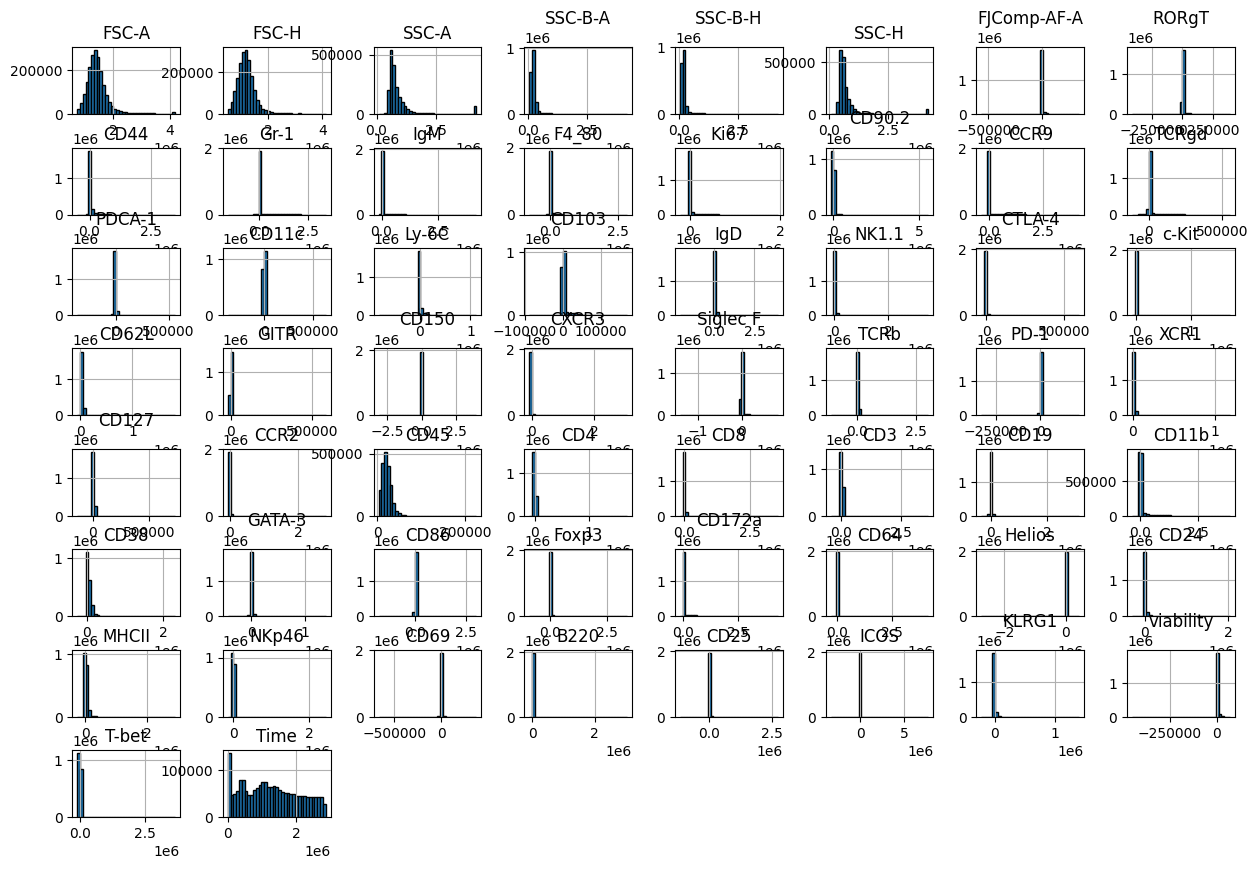

In [ ]:
df.hist(figsize=(15, 10), bins=35, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.4)

We can observe that variables like `FSC-A` or `FSC-H` shows a bell shape distribution variables. variables with Gaussian-like distributions can sometimes provide more meaningful results in t-SNE. This is because Gaussian distributions often represent a balanced spread of values, which can aid in preserving the local relationships and capturing the underlying structure of the data.

While variables with Gaussian distributions may offer advantages in certain scenarios, it is essential to assess the overall quality and relevance of the variables, including their information content and relevance to the underlying data structure, rather than solely relying on the shape of their distributions when using t-SNE.

Base on the above, we are going to use all the variables presenting in the data for learning purpose of the use of t-SNE.

## Create a sample of the dataset:




In the exploratory data analysis (EDA) section, we discovered that the dataset consists of a large number of observations, specifically 1,966,251. However, due to computational limitations, we will create a random sample for analysis purposes. The goal is to select 1000 observations from each type of cell, based on the values present in the `type_cell` column. This sampling strategy ensures that we have a representative subset of the data for further analysis using the t-SNE and UMAP algorithms.


In [ ]:
sample_size = 1000
categorical_variable = 'type_cell'

# Group the data by the categorical variable
grouped_data = df.groupby(categorical_variable)

# Randomly sample from each group
sampled_data = grouped_data.apply(lambda x: x.sample(n=min(sample_size, len(x))))

# Reset the index of the sampled data
sampled_data = sampled_data.reset_index(drop=True)

# View the sampled data
sampled_data.head()

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,FJComp-AF-A,RORgT,CD44,Gr-1,IgM,F4_80,Ki67,CD90.2,CCR9,TCRgd,PDCA-1,CD11c,Ly-6C,CD103,IgD,NK1.1,CTLA-4,c-Kit,CD62L,GITR,CD150,CXCR3,Siglec F,TCRb,PD-1,XCR1,CD127,CCR2,CD45,CD4,CD8,CD3,CD19,CD11b,CD38,GATA-3,CD86,Foxp3,CD172a,CD64,Helios,CD24,MHCII,NKp46,CD69,B220,CD25,ICOS,KLRG1,viability,T-bet,Time,type_cell
0,1100218.000,864013.0,816334.9375,228477.062500,198057.0,621265.0,2815.136963,64.102524,586.798889,494.785217,245.852753,-6976.778809,-121.789062,63219.664062,9103.805664,-559.353149,583.295532,-1412.697876,2779.380371,5383.824219,-63.907639,220.285263,3958.663330,23051.728516,26715.208984,4320.373535,-9912.164062,3599.358398,10000.846680,48550.941406,9730.656250,16817.732422,11307.015625,1934.473389,28019.964844,-2385.176025,37365.386719,11727.386719,-3497.534668,-8664.932617,5366.658203,12574.425781,103118.242188,5081.518066,-801.552734,3546.990723,1464.813599,-4060.812256,-3112.127441,385.178223,-224.004639,6121.314453,1375.157471,13780.079102,-2222.815430,1300.193359,-1849.101074,1494008.0,LN_12
1,1417509.500,1182166.0,796121.8750,233073.328125,212870.0,641460.0,3809.452881,-534.923767,33224.375000,6707.992188,-410.995178,-6263.550781,123.572266,38053.945312,-1696.849243,1336.425903,536.558105,-2874.692139,71430.281250,-909.986023,850.633423,-1668.812378,514.410339,2247.323730,75532.835938,5611.663574,5559.164551,7671.959961,-4760.001953,48122.949219,3022.454346,16614.984375,12553.234375,1771.490845,33982.843750,-815.974670,22302.158203,7729.716797,-1353.122559,-861.314453,12056.490234,12006.117188,61717.105469,3514.510742,3155.590332,1381.346313,-1258.628174,-852.605042,233.339828,1247.748535,-1761.458008,2239.039062,532.407532,1229.764771,265.133423,-238.593750,2376.186035,2709637.0,LN_12
2,1267955.125,1036920.0,671859.3125,188578.078125,167523.0,528830.0,6228.149902,229.476791,1782.148071,-4197.182617,-1763.377319,-4599.262207,-918.434570,47280.000000,-315.557495,-224.923233,-982.131592,-2153.931152,2951.576904,2800.191895,-71.398849,-2086.592529,603.802246,1808.298462,31576.751953,1788.790405,4136.337402,2734.807861,-6736.296875,63845.234375,3524.343262,14795.916016,10549.807617,1762.914551,24725.816406,-2077.318359,44191.792969,16125.154297,-7231.405762,-2254.204590,3868.703125,8927.000000,54483.261719,8077.083984,670.722168,49.421539,-2349.943604,-3348.256592,1492.298706,1124.209106,-3246.674805,2736.131592,515.688721,1333.018677,-4036.456055,1535.395508,-2636.979980,2240900.0,LN_12
3,1320769.250,1130421.0,646510.3750,145122.765625,131534.0,535292.0,-1815.788818,102.648651,65587.960938,-6849.142090,-2062.005127,1260.301514,2782.560547,52293.289062,-3948.560303,-655.073425,2795.062012,429.693451,18.084089,177.232300,1623.978149,24.680050,2924.485840,350.285278,8872.467773,7278.942871,8114.604004,1672.738159,-7480.736816,83149.906250,45.774696,25348.757812,-25.567129,543.888184,43243.718750,22319.667969,1639.158325,14521.305664,528.905518,-1910.456299,2841.769531,5385.266113,6996.713867,1026.945679,2059.289551,183.815216,441.917938,4359.723145,-1553.323730,197.790039,1969.853271,2168.381348,413.286377,9513.339844,622.989624,-1666.333984,4125.439941,2144165.0,LN_12
4,1241262.625,1077088.0,622722.5000,143591.218750,138026.0,509476.0,1268.902832,-129.135727,11388.471680,7231.327637,740.474792,6420.004883,50573.765625,28157.162109,5036.229004,1894.168579,607.537109,-170.400726,515.153320,5194.286133,-969.968262,-402.144684,-466.682312,2797.273926,34862.492188,5657.058105,-2203.891846,1146.279297,10000.223633,45818.503906,3935.163330,11231.458008,5992.219727,-1010.394958,22884.529297,599.980774,35503.402344,15945.457031,3205.217529,-9591.773438,4624.410156,-375.289734,35278.992188,-4367.509277,2002.258057,3343.454590,3525.984863,-1453.315430,-9023.849609,-1341.111816,6819.986816,3650.230469,390.777954,8451.477539,2353.944336,2404.795898,-2985.842285,480819.0,LN_12


In [ ]:
df.groupby('type_cell').size()

type_cell
LN_12        118842
LN_13         83783
LN_14         72866
LN_24         20000
LN_25         20000
LN_29         20000
LPL_21        20000
LPL_22        20000
LPL_23        20000
Lym_1          8297
Sp1_26        20000
Sp2_27        20000
Sp3_28        20000
Spleen_10    330765
Spleen_11    297946
Spleen_17     20000
Spleen_18     20000
Spleen_19     20000
Spleen_2      10000
Spleen_20     20000
Spleen_3      10000
Spleen_4      10000
Spleen_9     294399
Tissue_5      10000
Tissue_6      10000
Tissue_7      10000
siLPL_15     146819
siLPL_16     147465
siLPL_8      145069
dtype: int64

In [ ]:
sampled_data.groupby('type_cell').size()

type_cell
LN_12        1000
LN_13        1000
LN_14        1000
LN_24        1000
LN_25        1000
LN_29        1000
LPL_21       1000
LPL_22       1000
LPL_23       1000
Lym_1        1000
Sp1_26       1000
Sp2_27       1000
Sp3_28       1000
Spleen_10    1000
Spleen_11    1000
Spleen_17    1000
Spleen_18    1000
Spleen_19    1000
Spleen_2     1000
Spleen_20    1000
Spleen_3     1000
Spleen_4     1000
Spleen_9     1000
Tissue_5     1000
Tissue_6     1000
Tissue_7     1000
siLPL_15     1000
siLPL_16     1000
siLPL_8      1000
dtype: int64

## t-SNE (t-Distributed Stochastic Neighbor Embedding)

In [ ]:
#Standarize the data
std= StandardScaler()
standardized_data =std.fit_transform(sampled_data.drop("type_cell", axis=1))
print(standardized_data.shape)


(29000, 58)


In [ ]:
# Dataframe of the subset of the normalize dataset
df_subset = pd.DataFrame(standardized_data, columns=df.columns[:-1])

In [ ]:
# Perform t-SNE on the dataframe
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=1000)
tsne_result = tsne.fit_transform(df_subset)

<ipython-input-25-8d4c06056ae9>:5: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

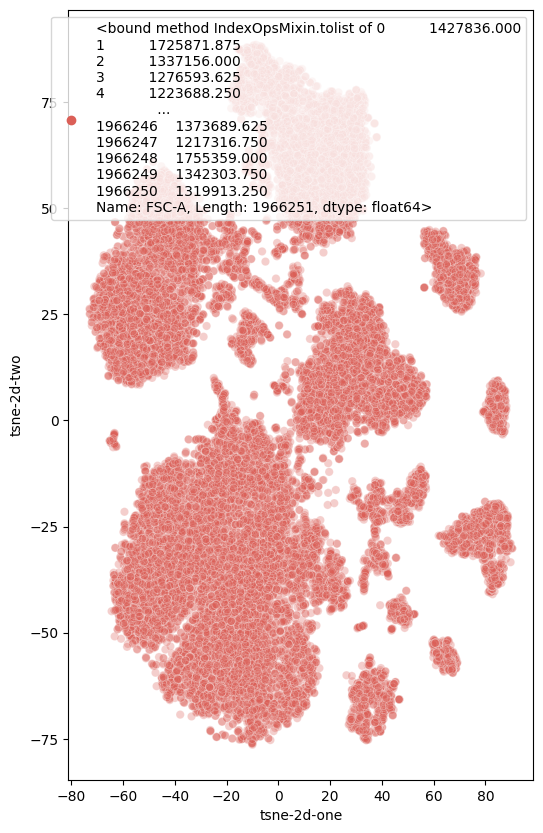

In [ ]:
df_subset['tsne-2d-one'] = tsne_result[:,0]
df_subset['tsne-2d-two'] = tsne_result[:,1]

plt.figure(figsize=(6,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue=df['FSC-A'].to_list,
    data=df_subset,
    legend="full",
    alpha=0.3
)

As we examine the dataset, it becomes evident that distinct clusters can be easily visualized by leveraging the inherent characteristics of the data. By utilizing a two-dimensional scatterplot, we can effectively identify and distinguish these clusters based on their unique features. The scatterplot provides a clear visual representation of the data points, allowing us to observe patterns and relationships among them. This visualization approach enhances our understanding of the underlying structure within the dataset and facilitates further analysis and interpretation.

In [ ]:
cell_types = ['LN_12', 'LN_13', 'LN_14', 'LN_24', 'LN_25', 'LN_29', 'LPL_21',
       'LPL_22', 'LPL_23', 'Lym_1', 'Sp1_26', 'Sp2_27', 'Sp3_28',
       'Spleen_10', 'Spleen_11', 'Spleen_17', 'Spleen_18', 'Spleen_19',
       'Spleen_2', 'Spleen_20', 'Spleen_3', 'Spleen_4', 'Spleen_9',
       'Tissue_5', 'Tissue_6', 'Tissue_7', 'siLPL_15', 'siLPL_16',
       'siLPL_8', 'Sp1_27','Sp2_26','Spleen_16','siLPL_17']

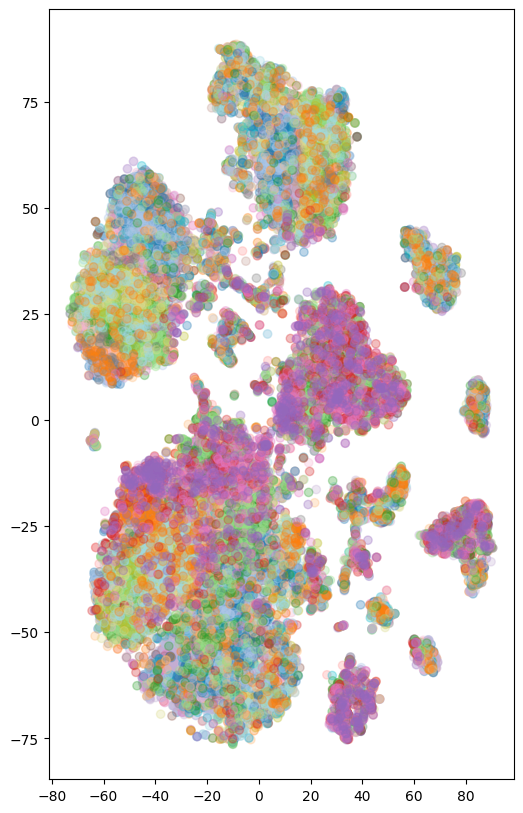

In [ ]:
color_palette = sns.color_palette("tab20", len(cell_types))

# Map cell types to corresponding indices in the color palette
cell_type_mapping = {cell_type: idx for idx, cell_type in enumerate(cell_types)}
plt.figure(figsize=(6,10))
plt.scatter(
  tsne_result[:,0],
  tsne_result[:,1],
  c=[color_palette[cell_type_mapping[cell]] for cell in sampled_data['type_cell']],
  label='type_cell',
  alpha=0.3
)

Interpretation:

We attempted to visualize the t-SNE representation after reducing the dimensionality of all variables using a scatterplot, with the hue parameter indicating the assigned labels. However, it should be noted that the results of the scatterplot did not clearly define distinct clusters or patterns based on the chosen label variable. Despite this, the scatterplot still offers a visual representation of the t-SNE results, providing some insights into the distribution and proximity of data points in the reduced-dimensional space. It serves as a starting point for further exploration and analysis to better understand the underlying structure within the data.

Upon careful consideration, we acknowledge that the lack of clarity in the cluster representation within the t-SNE visualization may not solely be attributed to the algorithm itself. Rather, it is possible that the selected label for the hue parameter may not be the most precise or appropriate choice for highlighting the distinct clusters effectively. It is crucial to reevaluate and explore alternative variables that have a stronger discriminatory power to enhance the visualization and accurately reveal the underlying cluster structure. By refining the selection of the hue label, we can potentially achieve a more accurate and insightful representation of the clusters within the t-SNE visualization.

In addition, it is crucial to emphasize the importance of domain knowledge in examining such situations. Domain expertise plays a critical role in interpreting the results and understanding the limitations of the chosen label for cluster representation.


# Using Tissue files just to continue practicing the t-SNE algorithm.

In [ ]:
# Read the data set just for Tissue file
df_array = []

# Iterate over each file in the directory
for file in os.listdir(directory_path):
    if file.endswith('.fcs') and file.startswith('Tissue'):
        # Create the file path
        file_path = os.path.join(directory_path, file)

        # Read the FCS file
        _, data = parse(file_path, meta_data_only=False, reformat_meta=True)

        # Append the data to the list
        df_array.append(data)

# Concatenate all the data arrays into a single array
combined_df = np.concatenate(df_array)
channel_names = list(data.keys())

# Create a dataframe from the combined data array
df_tissue = pd.DataFrame(combined_df, columns=channel_names)
pd.set_option('display.max_columns', None)
df_tissue.head()

,FSC-A,FSC-H,SSC-A,SSC-B-A,SSC-B-H,SSC-H,FJComp-AF-A,RORgT,CD44,Gr-1,IgM,F4_80,Ki67,CD90.2,CCR9,TCRgd,PDCA-1,CD11c,Ly-6C,CD103,IgD,NK1.1,CTLA-4,c-Kit,CD62L,GITR,CD150,CXCR3,Siglec F,TCRb,PD-1,XCR1,CD127,CCR2,CD45,CD4,CD8,CD3,CD19,CD11b,CD38,GATA-3,CD86,Foxp3,CD172a,CD64,Helios,CD24,MHCII,NKp46,CD69,B220,CD25,ICOS,KLRG1,viability,T-bet,Time
0,2694523.000,2246449.0,1.010888e+06,304492.343750,276368.0,799963.0,-4388.518555,-828.084351,194475.625000,40340.453125,1356.910889,18028.433594,93561.140625,5773.281250,3214.195801,3837.694824,-5740.424805,-282.039856,122880.132812,791.432373,-144.480942,1505.351929,125.212036,417.544769,53646.941406,1165.719116,-7659.400879,-1277.643677,19677.443359,1835.798218,-833.807495,17697.660156,-3021.482422,31751.906250,6771.403809,1307.713501,-1080.727295,5355.607422,-7912.894043,304472.062500,197.414062,-5739.089355,50364.859375,8641.150391,511503.312500,6339.095215,3760.795166,-1908.789185,-1421.052490,2509.488770,3370.161621,1710.089478,-341.001312,7827.109863,-664.838013,2952.582031,3993.746094,286.0
1,1403802.125,1193662.0,4.991541e+05,118435.914062,107918.0,405219.0,6703.020020,-2780.256836,10979.314453,508.728973,6581.779785,1560.299316,4500.575195,2425.878906,1498.233643,116.230751,852.720581,3570.172607,-9458.441406,-521.289978,95854.734375,-673.730103,263.148895,3013.142578,1291.920044,838.515564,624.193787,-1814.692871,10224.985352,1826.825928,5.276212,7301.726562,-691.842529,-1610.829102,17213.310547,-2547.141602,1608.633423,-2280.644043,29116.277344,-5667.684570,86821.671875,1590.427246,12474.116211,-790.977295,8250.902344,196.126160,421.299042,-3286.802246,77471.945312,-2849.955078,3889.108887,25210.195312,1080.134399,1724.547974,3914.020996,-2168.147949,5705.405273,286.0
2,1269776.875,1009154.0,8.588576e+05,213069.390625,155661.0,560342.0,-546.861206,-1784.141357,14789.103516,1514.809448,8589.250000,8076.180664,1414.118896,116.111816,-309.483429,-980.380005,1186.462158,411.116943,-2491.655273,-53.827236,81716.609375,629.193054,659.567139,1770.402222,1502.683105,203.569153,3114.001221,1639.971558,-14844.217773,365.047546,496.418671,10124.611328,-2450.677979,550.040527,27120.568359,855.291077,1423.210205,4748.255859,24390.595703,-5277.272949,73010.570312,-6820.495117,9058.912109,638.893494,6008.074219,613.513794,-1818.455566,9730.638672,66303.164062,959.210205,2526.991699,21688.101562,1526.667603,2656.890625,2490.210205,10.998291,3024.002930,286.0
3,1637481.250,1423881.0,5.017109e+05,120292.921875,114481.0,429877.0,-2350.406982,-125.889000,14023.805664,398.324860,4948.600098,6377.201660,2042.318115,-116.167969,-1069.096436,-1042.559570,110.756096,1565.328979,-5290.442383,-387.264069,57253.074219,-212.179108,204.159180,309.169495,1976.271973,-1355.068726,10215.052734,1684.051147,-8494.967773,661.778931,154.801910,11757.158203,-1662.225830,-1087.917236,14437.407227,877.393677,719.916016,2115.635010,19325.052734,-3806.527344,79664.851562,-4948.250000,8580.098633,-854.621643,4734.211426,-4.893634,177.759674,7583.365234,50060.171875,-35.402222,2613.438721,19084.625000,1264.839478,-6714.529297,4828.866211,-767.118164,1583.056641,286.0
4,1335368.500,1137696.0,8.410000e+05,179476.781250,159557.0,694343.0,-1813.307617,525.543213,13600.460938,-645.020874,8203.369141,3370.970703,189254.640625,-130.564453,945.702148,1280.892944,-2756.582031,-1198.604370,5082.796387,-572.590332,2406.686523,286.604706,-101.938873,-325.178650,-819.912476,93.519653,-2060.793457,142.485870,-6807.473145,-951.309021,2601.101562,12426.507812,2782.670410,188.627533,15182.439453,-196.495773,632.608215,2618.770020,21038.365234,1963.865234,15737.791016,807.497925,34435.230469,12446.226562,-337.056152,1022.171997,-10.262753,68433.718750,116279.726562,-253.847534,898.913574,30894.917969,1397.491943,8116.449707,433.660339,-1750.341797,3265.618164,286.0


In [ ]:
# Standarize the data
std= StandardScaler()
standardized_df_tissue =std.fit_transform(df_tissue)
print(standardized_df_tissue.shape)

(30000, 58)


In [ ]:
# Perform t-SNE on the dataframe
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(standardized_df_tissue)

<ipython-input-30-f48925636e0f>:5: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='tsne-2d-one_tissue', ylabel='tsne-2d-two_tissue'>

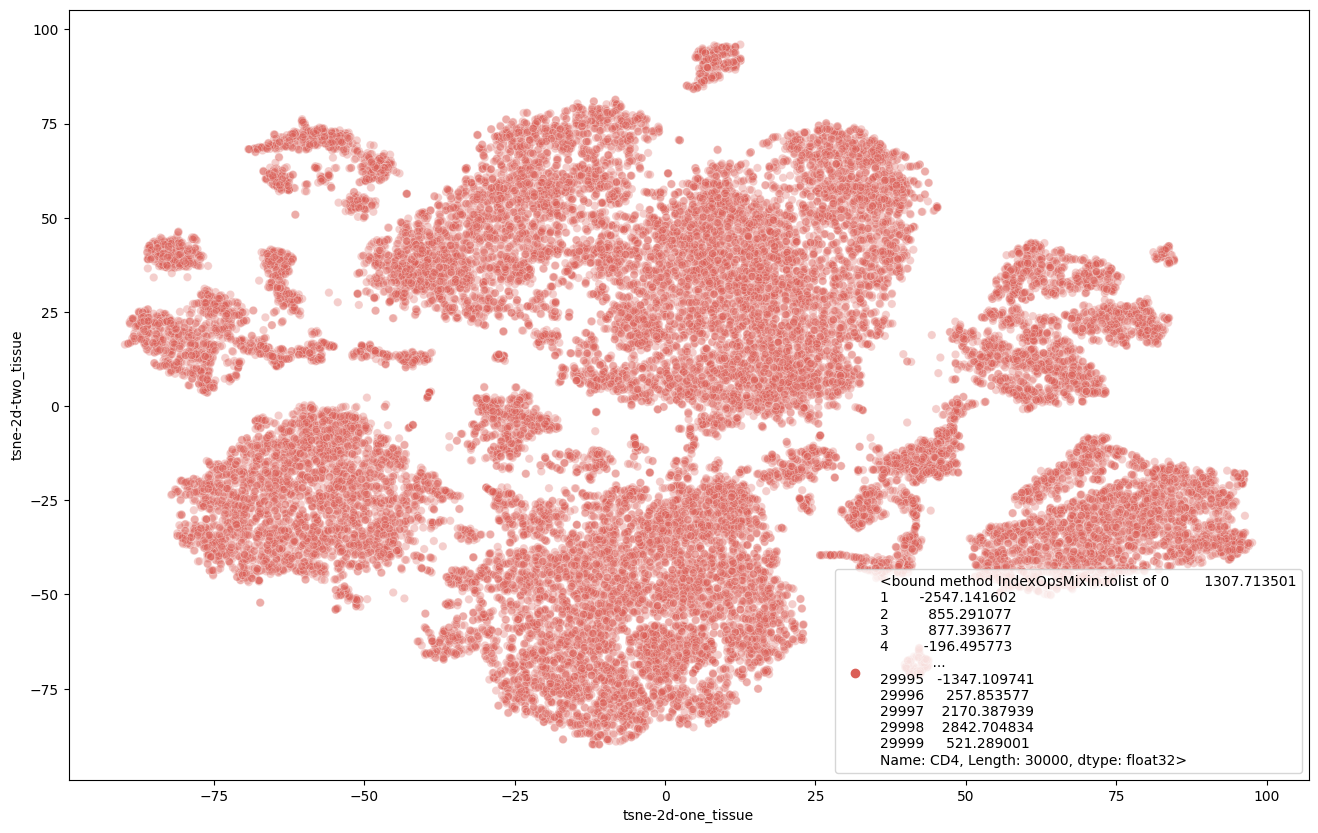

In [ ]:
df_tissue['tsne-2d-one_tissue'] = tsne_result[:,0]
df_tissue['tsne-2d-two_tissue'] = tsne_result[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one_tissue", y="tsne-2d-two_tissue",hue=df_tissue['CD4'].to_list,
    palette=sns.color_palette("hls", 10),
    data=df_tissue,
    legend="full",
    alpha=0.3
)

To provide a concrete example, we focused on using the files prefixed with Tissue to perform dimensionality reduction while preserving the underlying patterns of the data points. Through the application of t-SNE, we observed that the technique successfully identified and clustered these patterns, facilitating visualization and analysis. This example highlights the efficacy of t-SNE in capturing and representing the intricate structure within the dataset. It serves as a testament to the usefulness of dimensionality reduction techniques like t-SNE in revealing meaningful patterns and enabling insightful visualizations for further analysis.


# UMAP


In [ ]:
# Perform UMAP on the dataframe
umap_reducer = umap.UMAP(n_neighbors = 15, n_components = 2, min_dist = 0.1, metric = 'euclidean')
umap_result = umap_reducer.fit_transform(df_subset)

<ipython-input-38-b0a01b0bf5e0>:5: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='umap-2d-one', ylabel='umap-2d-two'>

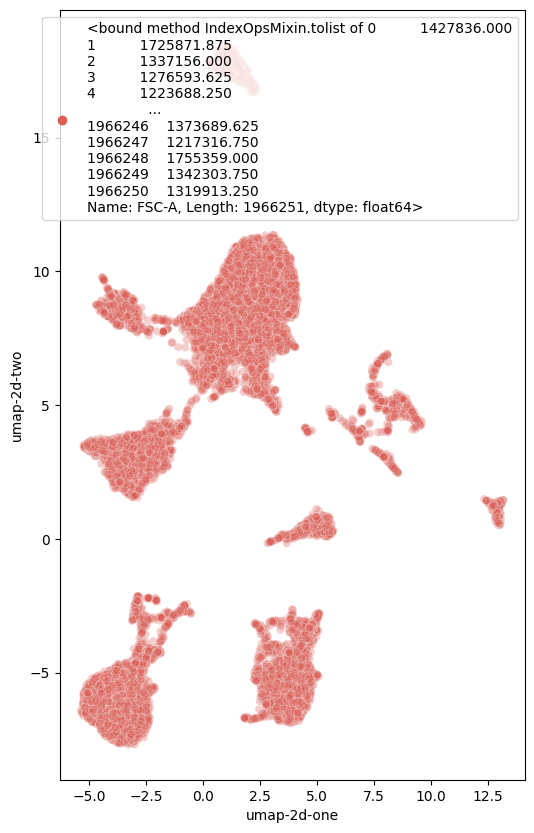

In [ ]:
df_subset['umap-2d-one'] = umap_result[:,0]
df_subset['umap-2d-two'] = umap_result[:,1]

plt.figure(figsize=(6,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    palette=sns.color_palette("hls", 2),
    hue=df['FSC-A'].to_list,
    data=df_subset,
    legend="full",
    alpha=0.3
)

In this scatterplot, we can observe the UMAP results, which represent a reduction of the high-dimensional dataset into a 2-dimensional representation. The plot is created using the values from the 'umap-2d-one' and 'umap-2d-two' columns as the x and y coordinates, respectively.

The UMAP algorithm organizes the data points in the scatterplot, forming clusters based on the global relationships between the data points in the x and y columns. These clusters indicate groups of data points that share similar characteristics or exhibit similar behavior.

By visualizing the scatterplot, we can gain insights into the underlying structure and patterns of the data. The proximity of points within a cluster suggests similarity, while the separation between clusters indicates dissimilarity or distinct groups within the data.

Now, we will create a new scatterplot where we will see the different clusters created based on the values stored in the `type_cell` column:


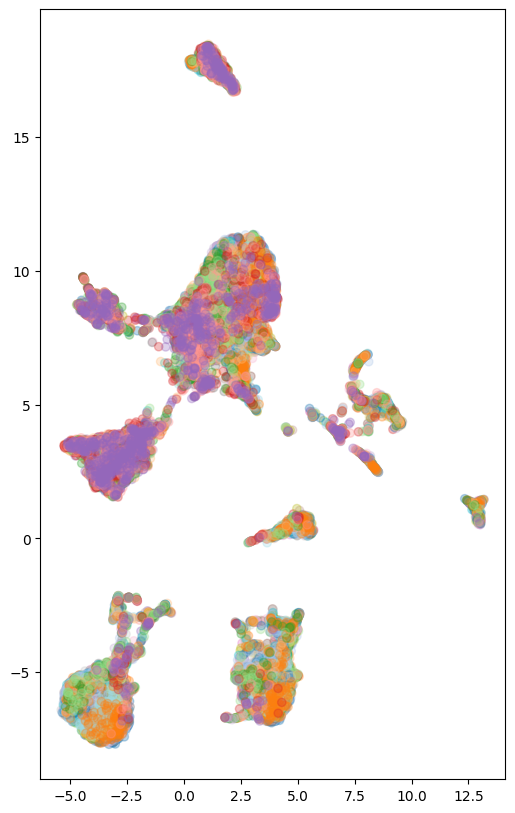

In [ ]:
color_palette = sns.color_palette("tab20", len(cell_types))

# Map cell types to corresponding indices in the color palette
plt.figure(figsize=(6,10))
plt.scatter(
  umap_result[:,0],
  umap_result[:,1],
  c=[color_palette[cell_type_mapping[cell]] for cell in sampled_data['type_cell']],
  label='type_cell',
  alpha=0.3
)

This scatterplot allows us to observe the relationships and groupings that UMAP has identified and we can see that the clusters created by the algorithm are clearly visible, indicating successful dimension reduction. However, it is challenging to differentiate the type of cell represented by each cluster due to overlapping points.


# Using Tissue files just to continue practicing the  UMAP

In [ ]:
# Perform UMAP on the dataframe
umap_reducer2 = umap.UMAP(n_neighbors = 15, n_components = 2, min_dist = 0.1, metric = 'euclidean')
umap_result2 = umap_reducer2.fit_transform(standardized_df_tissue)

<ipython-input-45-ac5a188a4774>:5: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='umap-2d-one_tissue', ylabel='umap-2d-two_tissue'>

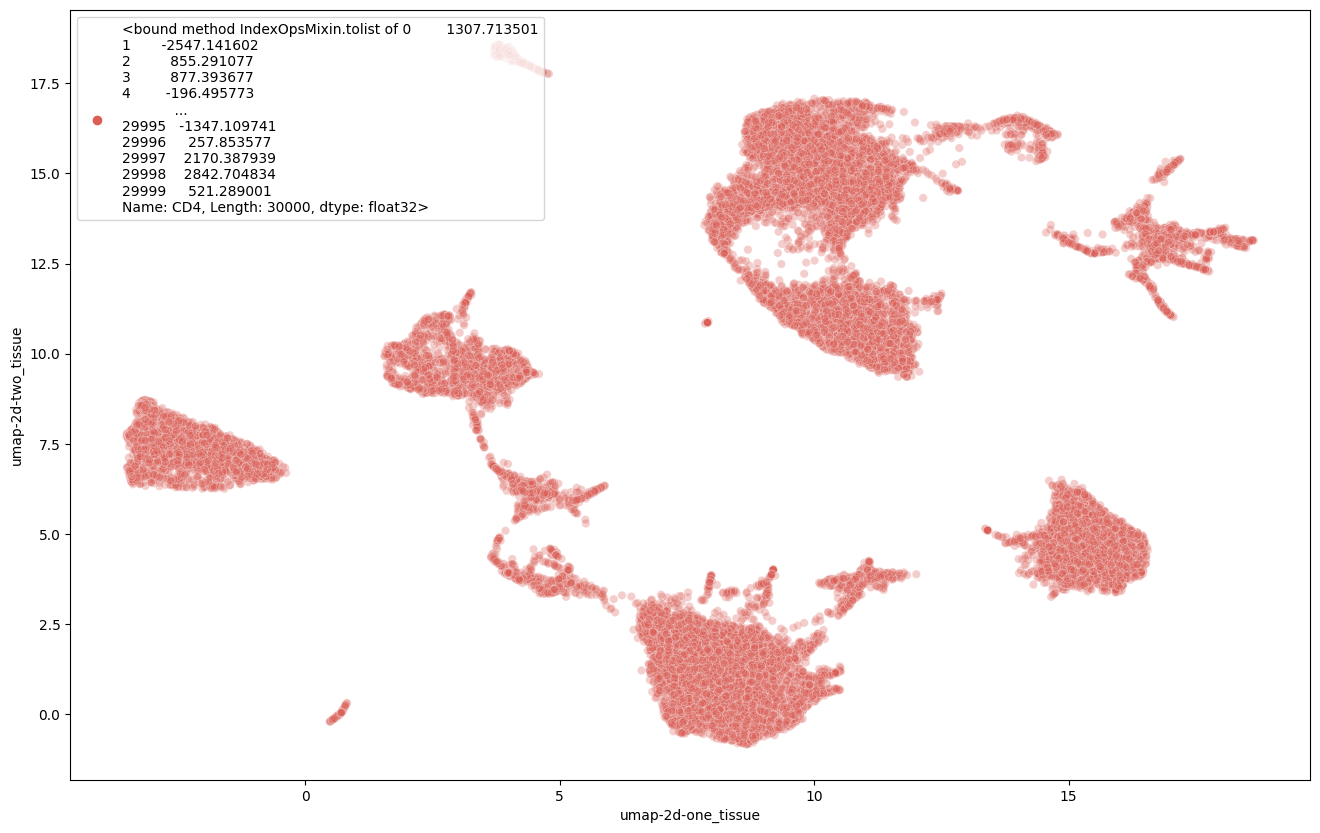

In [ ]:
df_tissue['umap-2d-one_tissue'] = umap_result2[:,0]
df_tissue['umap-2d-two_tissue'] = umap_result2[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one_tissue", y="umap-2d-two_tissue",hue=df_tissue['CD4'].to_list,
    palette=sns.color_palette("hls", 10),
    data=df_tissue,
    legend="full",
    alpha=0.3
)

In the scatterplot generated from the t-SNE algorithm on the Tissue data, we can easily discern the distinct clusters formed by the UMAP algorithm. These clusters represent groups of data points that share similar characteristics or exhibit similar behavior, providing valuable insights into the underlying structure of the data.

This clear identification of clusters in the scatterplot is significant as it allows for further analysis of the cell information. By studying the characteristics, properties, or behaviors of the cells within each cluster, we can uncover trends, patterns, or relationships that exist within the data. This knowledge can then be leveraged to make informed decisions or derive meaningful conclusions in various domains, such as biology, healthcare, or research.

# General Conclusions

* t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space. Its primary use is for data visualization and exploration, revealing patterns and clusters that may not be apparent in the original data.
* UMAP (Uniform Manifold Approximation and Projection) is a dimensionality reduction technique commonly used for visualizing high-dimensional data.
* t-SNE can be used as a preprocessing step to improve classification or clustering models by providing a condensed representation of the data. It can also aid in investigating data segmentation and assessing cluster separation.
* t-SNE is not a clustering algorithm itself and should be used for exploration rather than definitive classification or clustering.
* Interpreting a UMAP plot involves understanding the patterns, clusters, and relationships between data points in the low-dimensional embedding. Here are some key points to consider when interpreting a UMAP plot: Clusters and Groupings, Separation and Distance, Continuity and Connectivity, Global and Local Structure, Density, Shape and Orientation.
* It is important to acknowledge that the chosen label (in this case`type_cell`) may not be suitable for effectively distinguishing different clusters in the lower-dimensional space. Other variables, such as sex, age, or additional relevant factors, may provide better discrimination and offer more meaningful insights into the data's structure. Exploring alternative variables could potentially reveal clearer patterns and help to identify distinct clusters in the reduced-dimensional representation. Thus, considering additional variables beyond the current label is crucial to achieve a more accurate understanding of the underlying clusters in the data.
* Furthermore, it is worth emphasizing that domain knowledge plays a pivotal role in enhancing further analysis. The expertise and understanding of the specific domain can provide valuable insights and guidance when exploring alternative variables for cluster differentiation in the lower-dimensional space. Leveraging domain knowledge can lead to significant improvements in uncovering meaningful patterns and gaining a deeper understanding of the data's underlying structure. By combining the power of data analysis techniques with domain expertise, researchers and practitioners can unlock new perspectives and make more informed interpretations, ultimately enriching the overall analysis process.

